# Performing Gradient Descent in Regression

Now that we have understood how the gradient descent algorithm finds the optimal parameters of the model, in this section, we will understand how can we use gradient descent in linear regression and find the optimal parameter.


The equation of a simple linear regression can be expressed as:

$$ \hat{y} = mx + b  -- (1)$$ 

Thus, we have two parameters $m$ and $b$. We will see how can we use gradient descent and find the optimal values for these two parameters $m$ and $b$. 


# Import the Libraries

Import the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Prepare the dataset

We generate some random data points with 500 rows and 2 columns (x and y) and use for training:

In [2]:
data = np.random.randn(500, 2)

As you can see our data has two columns:

In [3]:
data[0]

array([-1.16100447, -1.86143301])

First column indicates the $x$ value:

In [4]:
data[0,0]

-1.1610044684790515

Second column indicates the $y$ value:

In [5]:
data[0,1]

-1.8614330055403117

We know that equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an array called theta. First, we initialize theta with zeros as shown below:

In [6]:
theta = np.zeros(2)

In [7]:
theta

array([0., 0.])

theta[0] represents the value of $m$ and theta[1] represents the value of $b$

# Loss Function 

Mean Squared Error (MSE) of Regression is given as:

$$J=\frac{1}{N} \sum_{i=1}^{N}(y-\hat{y})^{2} -- (2) $$


Where $N$ is the number of training samples, $y$ is the actual value and $\hat{y}$ is the predicted value.

The above loss function can be implemented as:

We feed the data and the model parameter theta to the loss function which returns the MSE. Remember, data[,0] has $x$ value and data[,1] has $y$ value. Similarly, theta [0] has a value of $m$ and theta[1] has a value of $b$. 

In [8]:
def loss_function(data,theta):
    
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss = 0
    
    #for each iteration
    for i in range(0, len(data)):
        
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        
        #predict the value of y 
        y_hat = (m*x + b)
        
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
        
    #mean sqaured error
    mse = loss / float(len(data))
        
    return mse

When we feed our randomly initialized data and model parameter theta, the loss_function returns the mean squared loss as shown below:

In [9]:
loss_function(data, theta)

1.0217161066273013

Now, we need to minimize this loss. In order to minimize the loss, we need to calculate the gradient of the loss function $J$ with respect to the model parameters $m$ and $b$ and update the parameter according to the parameter update rule. So, first, we will calculate the gradient of the loss function.

# Gradients of Loss Function 


Gradients of loss function $J$ with respect to parameter $m$ is given as:


$$ \frac{d J}{d m}=\frac{2}{N} \sum_{i=1}^{N}-x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right) -- (3) $$


Gradients of loss function $J$ with respect to parameter $b$ is given as:


$$ \frac{d J}{d b}=\frac{2}{N} \sum_{i=1}^{N}-\left(y_{i}-\left(m x_{i}+b\right)\right) -- (4) $$

We define a function called compute_gradients which takes the data and parameter theta as an input and returns the computed gradients: 

In [10]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)
    
    #total number of data points
    N = float(len(data))
    
    m = theta[0]
    b = theta[1]
    
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
           
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [11]:
compute_gradients(data,theta)

array([-0.00018707,  0.00020307])

Thus, when we feed the randomly initialized data and model parameter theta, the compute_gradients function returns the gradients of $m$ i.e $\frac{d J}{d m}$ and gradients of $b$ i.e  $\frac{d J}{d b}$. 

# Update Rule

After computing gradients we need to update our model paramater according to our update rule as given below:

$$m=m-\alpha \frac{d J}{d m} -- (5) $$ 

$$ b=b-\alpha \frac{d J}{d b} --(6) $$


Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as: 

$$\theta = \theta - \alpha \frac{dJ}{d\theta} -- (7) $$

As we learned in the previous section, updating gradients for just one time will not lead us to the convergence i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for several iterations:


Set the number of iterations:

In [12]:
num_iterations = 50000

Define the learning rate:

In [13]:
lr = 1e-2

Define a list called loss for storing the loss on every iterations:

In [14]:
loss = []

On each iteration, calculate gradients and update the gradients according to our paramater update rule (7):

In [15]:
theta = np.zeros(2)

for t in range(num_iterations):
    
    #compute gradients
    gradients = compute_gradients(data, theta)
    
    #update parameter
    theta = theta - (lr*gradients)
    
    #store the loss
    loss.append(loss_function(data,theta))

The below plot shows how the loss(cost) decreases over the training iterations:

Text(0.5,1,'Gradient Descent')

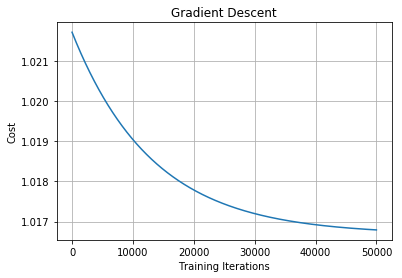

In [16]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

Thus, we learned that gradient descent can be used for finding the optimal parameters of the model with which we can minimize the loss. In the next section, we will learn several variants of gradient descent algorithm.